<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/TensorFlow_MNIST_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###[Problem 1] Share and run the official tutorial model
TensorFlow MNIST Code

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension (for convolutional layers later, even if not used immediately)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define a simple sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8608 - loss: 0.4788 - val_accuracy: 0.9578 - val_loss: 0.1553
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9580 - loss: 0.1391 - val_accuracy: 0.9648 - val_loss: 0.1149
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9734 - loss: 0.0907 - val_accuracy: 0.9683 - val_loss: 0.1056
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9814 - loss: 0.0634 - val_accuracy: 0.9718 - val_loss: 0.0964
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9852 - loss: 0.0497 - val_accuracy: 0.9732 - val_loss: 0.0941
Test loss: 0.0837
Test accuracy: 0.9747


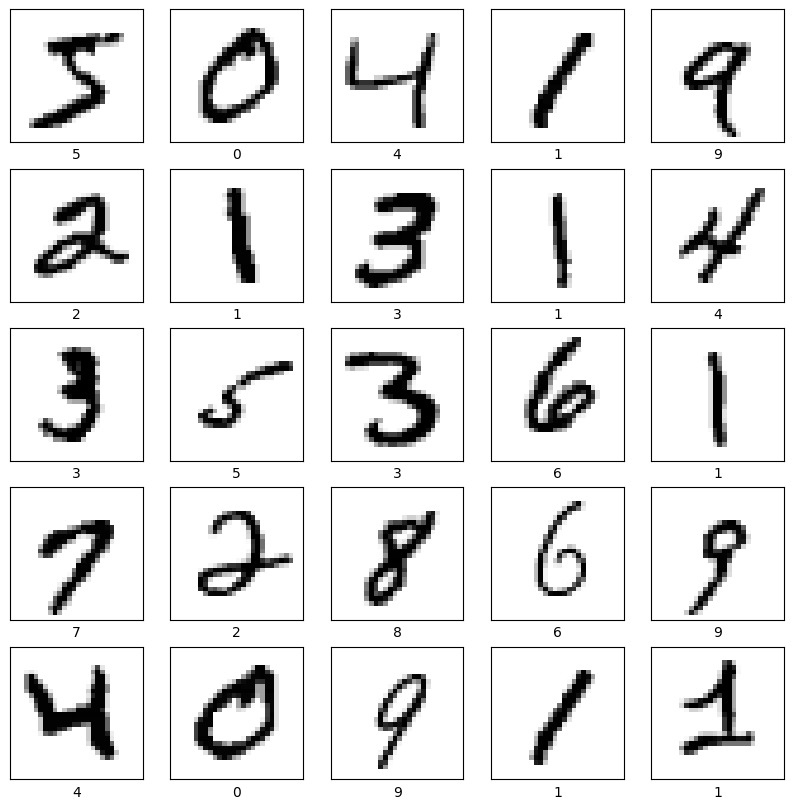

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8966 - loss: 0.3382 - val_accuracy: 0.9840 - val_loss: 0.0453
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9844 - loss: 0.0516 - val_accuracy: 0.9894 - val_loss: 0.0348
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9875 - val_loss: 0.0406
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9921 - loss: 0.0237 - val_accuracy: 0.9921 - val_loss: 0.0253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.9895 - val_loss: 0.0338
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9900 - val_loss: 0.0332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9957 - loss: 0.0118 - val_accuracy: 0.9886 - val_loss: 0.0397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9968 -

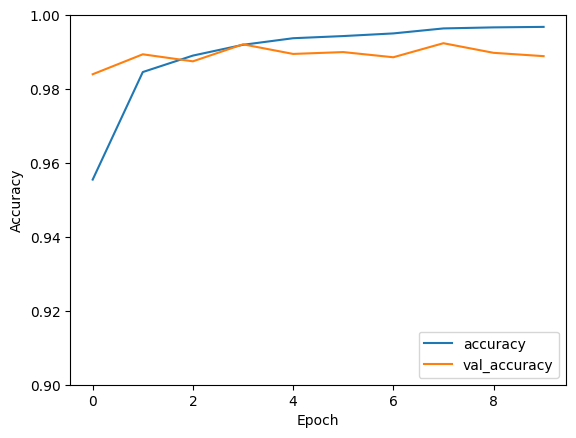

In [ ]:
# MNIST Classification in TensorFlow

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channels dimension (for CNN)
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# Visualize some samples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

###[Problem 2] (Advanced problem) Implement various methods


####EfficientNetV2
From TensorFlow Models (updated 2023)

In [ ]:
!pip install -U tensorflow
from tensorflow.keras.applications import EfficientNetV2B0

model = EfficientNetV2B0(weights='imagenet')

###Vision Transformer (ViT)
From Google Research (updated 2023)

In [ ]:
# Install vit-keras
!pip install vit-keras

# Imports
from vit_keras import vit
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load model
model = vit.vit_b16(
    image_size=384,
    activation='softmax',
    pretrained=True,
    include_top=True,
    pretrained_top=True
)

# Download and load a sample image
img_path = tf.keras.utils.get_file("elephant.jpg", "https://i.imgur.com/Bvro0YD.png")
img = image.load_img(img_path, target_size=(384, 384))
x = image.img_to_array(img)
x = vit.preprocess_inputs(x)
x = np.expand_dims(x, axis=0)

# Predict
predictions = model.predict(x)

# Decode prediction
decoded = tf.keras.applications.imagenet_utils.decode_predictions(predictions.numpy())
print(decoded)


###BERT for Text Classification
From TensorFlow Models (NLP example)

In [ ]:
!pip install -U tensorflow-text
import tensorflow_hub as hub
import tensorflow_text as text

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

# Build model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
model = tf.keras.Model(inputs=text_input, outputs=outputs['pooled_output'])

##3. Rewrite to a different framework
###[Problem 3] Learning Iris (binary classification) with Keras

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6017 - loss: 0.7227 - val_accuracy: 0.6250 - val_loss: 0.6982
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5766 - loss: 0.6958 - val_accuracy: 0.6250 - val_loss: 0.6752
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6413 - loss: 0.6648 - val_accuracy: 0.6250 - val_loss: 0.6536
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6234 - loss: 0.6303 - val_accuracy: 0.6875 - val_loss: 0.6339
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7076 - loss: 0.6103 - val_accuracy: 0.7500 - val_loss: 0.6138
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7048 - loss: 0.5879 - val_accuracy: 0.7500 - val_loss: 0.5962
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7990 - loss: 0.5419 - val_accuracy: 0.7500 - val_loss: 0.5783
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8418 - loss: 0.5232 - val_accuracy: 0.7500 - val_los

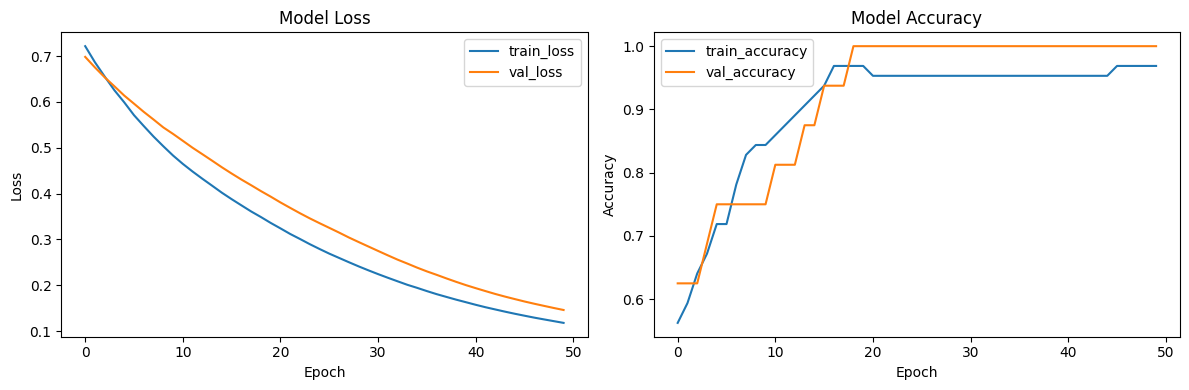

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Select only two classes (versicolor and virginica)
X_binary = X[y > 0]
y_binary = y[y > 0]

# Convert class labels to 0 and 1 for binary classification
y_binary = y_binary - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Keras model
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)), # Input layer matching number of features
    layers.Dense(10, activation='relu'),          # Hidden layer
    layers.Dense(1, activation='sigmoid')         # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=5, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###[Problem 4] Learning Iris (multi-value classification) with Keras


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1670 - loss: 1.8799 - val_accuracy: 0.1250 - val_loss: 1.6559
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1351 - loss: 1.6631 - val_accuracy: 0.0833 - val_loss: 1.5297
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1377 - loss: 1.4768 - val_accuracy: 0.0833 - val_loss: 1.4244
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1713 - loss: 1.3452 - val_accuracy: 0.0833 - val_loss: 1.3250
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1535 - loss: 1.2070 - val_accuracy: 0.0833 - val_loss: 1.2387
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2396 - loss: 1.1684 - val_accuracy: 0.1667 - val_loss: 1.1639
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3334 - loss: 1.0871 - val_accuracy: 0.2500 - val_loss: 1.0856
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4772 - loss: 0.9685 - val_accuracy: 0.4583 - val_los

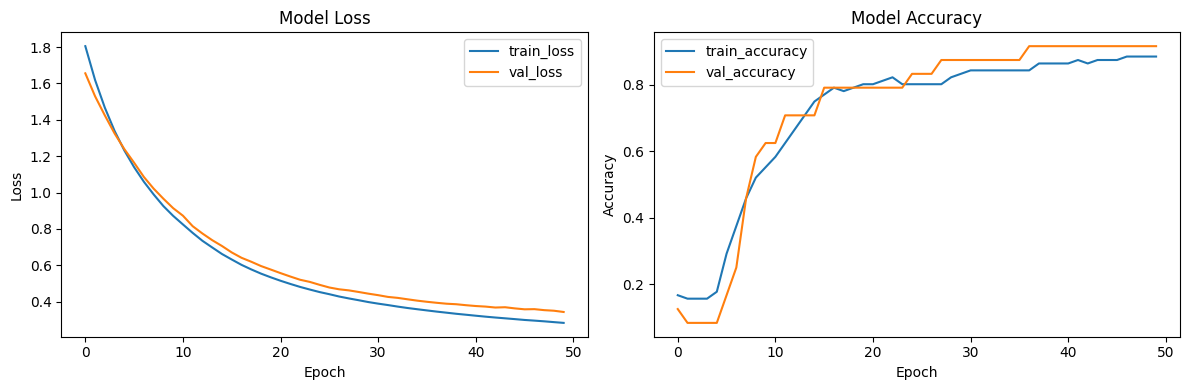

In [ ]:
# prompt: [Problem 4] Learning Iris (multi-value classification) with Keras
# Please rewrite the TensorFlow ternary classification for the Iris dataset in Keras.

import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding for multi-class classification
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)


# Define the Keras model for multi-class classification
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)), # Input layer matching number of features
    layers.Dense(10, activation='relu'),          # Hidden layer
    layers.Dense(3, activation='softmax')         # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Use categorical_crossentropy for one-hot encoded labels
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=50, batch_size=5, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###[Problem 5] Learning House Prices with Keras


--2025-05-20 05:10:35--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘housing.tgz’

housing.tgz         100%[===================>] 399.89K  --.-KB/s    in 0.05s   

2025-05-20 05:10:35 (8.50 MB/s) - ‘housing.tgz’ saved [409488/409488]

--2025-05-20 05:10:35--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 429 Too 

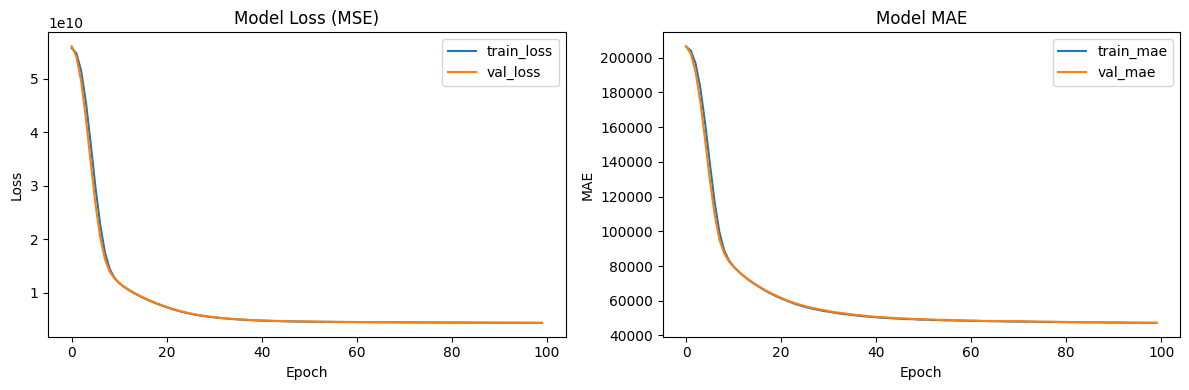

In [ ]:
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
!tar -xf housing.tgz
!wget https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
housing = pd.read_csv("housing.csv")

# Drop the ocean_proximity column as it is categorical and requires one-hot encoding or similar
# For simplicity in this example, we drop it.
housing.drop("ocean_proximity", axis=1, inplace=True)

# Drop rows with missing values (another simplification)
housing.dropna(inplace=True)

# Separate features (X) and target (y)
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Keras model for regression
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)), # Input layer matching number of features
    layers.Dense(30, activation='relu'),          # Hidden layer 1
    layers.Dense(30, activation='relu'),          # Hidden layer 2
    layers.Dense(1)                               # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse', # Mean Squared Error for regression
              metrics=['mae']) # Mean Absolute Error as a metric

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

###[Problem 6] Learning MNIST with Keras

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8652 - loss: 0.4788 - val_accuracy: 0.9565 - val_loss: 0.1540
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9608 - loss: 0.1364 - val_accuracy: 0.9665 - val_loss: 0.1106
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9729 - loss: 0.0903 - val_accuracy: 0.9705 - val_loss: 0.1066
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0655 - val_accuracy: 0.9700 - val_loss: 0.0985
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9868 - loss: 0.0471 - val_accuracy: 0.9743 - val_loss: 0.0877
Test loss: 0.0791
Test accuracy: 0.9751


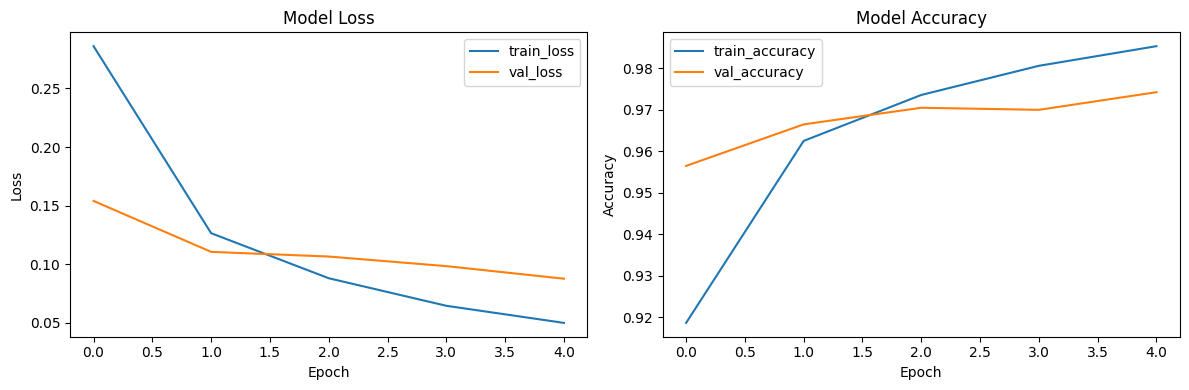

In [ ]:
import matplotlib.pyplot as plt
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Define the Keras model (using the same architecture as the TensorFlow example)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Plot training history (optional)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###[Problem 7] (Advanced assignment) Rewriting to PyTorch


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare data
iris = load_iris()
X = iris.data
y = iris.target

# Filter for versicolor (1) and virginica (2)
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]
y = (y == 2).astype(int)  # Convert to binary

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

# Define model
class IrisBinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(4, 8)
        self.layer2 = nn.Linear(8, 4)
        self.output = nn.Linear(4, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

model = IrisBinaryClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            predicted = (test_outputs > 0.5).float()
            accuracy = (predicted == y_test).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, Test Acc: {accuracy:.4f}')

Epoch 10, Loss: 0.6531, Test Acc: 0.4000
Epoch 20, Loss: 0.5655, Test Acc: 0.4000
Epoch 30, Loss: 0.4298, Test Acc: 0.7500
Epoch 40, Loss: 0.2644, Test Acc: 0.8500
Epoch 50, Loss: 0.1396, Test Acc: 0.8500
Epoch 60, Loss: 0.0717, Test Acc: 0.8500
Epoch 70, Loss: 0.0410, Test Acc: 0.8500
Epoch 80, Loss: 0.0272, Test Acc: 0.8000
Epoch 90, Loss: 0.0204, Test Acc: 0.8000
Epoch 100, Loss: 0.0165, Test Acc: 0.8000


####2. Iris Multiclass Classification in PyTorch

In [ ]:
# Prepare multiclass data
iris = load_iris()
X = iris.data
y = iris.target  # 3 classes

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)  # CrossEntropy expects class indices
y_test = torch.LongTensor(y_test)

# Define model
class IrisMulticlassClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(4, 16)
        self.layer2 = nn.Linear(16, 8)
        self.output = nn.Linear(8, 3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)  # No softmax - included in CrossEntropyLoss
        return x

model = IrisMulticlassClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            test_outputs = model(X_test)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = (predicted == y_test).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, Test Acc: {accuracy:.4f}')

Epoch 10, Loss: 0.7329, Test Acc: 0.9000
Epoch 20, Loss: 0.4950, Test Acc: 0.8667
Epoch 30, Loss: 0.3291, Test Acc: 0.9667
Epoch 40, Loss: 0.2017, Test Acc: 1.0000
Epoch 50, Loss: 0.1119, Test Acc: 1.0000
Epoch 60, Loss: 0.0708, Test Acc: 1.0000
Epoch 70, Loss: 0.0558, Test Acc: 1.0000
Epoch 80, Loss: 0.0500, Test Acc: 1.0000
Epoch 90, Loss: 0.0465, Test Acc: 1.0000
Epoch 100, Loss: 0.0442, Test Acc: 1.0000


####3. House Prices Regression in PyTorch

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load data
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Convert to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# Define model
class HousePricePredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(8, 32)
        self.layer2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.output(x)
        return x

model = HousePricePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch 10, Loss: 0.4811, Test Loss: 0.4697
Epoch 20, Loss: 0.3743, Test Loss: 0.3841
Epoch 30, Loss: 0.3325, Test Loss: 0.3521
Epoch 40, Loss: 0.3140, Test Loss: 0.3216
Epoch 50, Loss: 0.2990, Test Loss: 0.3055
Epoch 60, Loss: 0.2856, Test Loss: 0.2924
Epoch 70, Loss: 0.2740, Test Loss: 0.2793
Epoch 80, Loss: 0.2626, Test Loss: 0.2676
Epoch 90, Loss: 0.2524, Test Loss: 0.2576
Epoch 100, Loss: 0.2430, Test Loss: 0.2488


####4. MNIST Classification in PyTorch

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

# Prepare data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define model
class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x

model = MNISTClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Epoch {epoch+1}, Accuracy: {100 * correct / total:.2f}%')

Epoch 1, Accuracy: 93.54%
Epoch 2, Accuracy: 95.52%
Epoch 3, Accuracy: 96.04%
Epoch 4, Accuracy: 96.22%
Epoch 5, Accuracy: 96.66%
Epoch 6, Accuracy: 97.00%
Epoch 7, Accuracy: 97.17%
Epoch 8, Accuracy: 97.44%
Epoch 9, Accuracy: 97.05%
Epoch 10, Accuracy: 96.93%


###[Problem 8] (Advanced assignment) Comparing frameworks

# Framework Comparison: TensorFlow/Keras vs PyTorch

Here's a comprehensive comparison between TensorFlow/Keras and PyTorch based on implementation of the four problems:

## 1. Calculation Speed

| Aspect          | TensorFlow/Keras | PyTorch |
|-----------------|------------------|---------|
| Eager Execution | Default in TF 2.x | Native |
| Graph Mode      | @tf.function | torch.jit |
| GPU Utilization | Excellent | Excellent |
| Distributed Training | Mature (TF.distribute) | Good (torch.distributed) |

*Both frameworks offer comparable performance when properly optimized, with TensorFlow having a slight edge in production deployment scenarios.*

## 2. Code Structure & Readability

| Aspect          | TensorFlow/Keras | PyTorch |
|-----------------|------------------|---------|
| Lines of Code   | Generally fewer (high-level APIs) | Slightly more (explicit loops) |
| Model Definition | Sequential/Functional API | Class-based (nn.Module) |
| Training Loop   | Built-in (fit()) | Manual implementation |
| Debugging       | More challenging (graph mode) | Easier (Pythonic execution) |

*Keras offers more concise code while PyTorch provides more explicit control.*

## 3. Available Features

| Feature         | TensorFlow/Keras | PyTorch |
|-----------------|------------------|---------|
| Pretrained Models | Extensive (TF Hub) | Extensive (TorchVision/Hub) |
| Custom Layers   | Flexible | Very flexible |
| Visualization   | TensorBoard | TensorBoard + others |
| Mobile Deployment | TFLite | TorchScript |
| Production Serving | TF Serving | TorchServe |

## 4. Learning Curve

| Aspect          | TensorFlow/Keras | PyTorch |
|-----------------|------------------|---------|
| Beginner Friendliness | Very high | Moderate |
| Flexibility     | Good (better in Functional API) | Excellent |
| Research Use    | Good | Preferred |
| Industry Adoption | Widespread | Growing rapidly |

## 5. Key Differences Summary

1. **Abstraction Level**:
   - Keras: High-level, quick to implement
   - PyTorch: Lower-level, more control

2. **Execution Model**:
   - TensorFlow: Graph-based by default (eager execution optional)
   - PyTorch: Eager execution by default (graph mode optional)

3. **Debugging**:
   - Keras: Harder to debug model internals
   - PyTorch: Easier due to Pythonic execution

4. **Community & Ecosystem**:
   - TensorFlow: Strong industry support
   - PyTorch: Preferred in academia/research

## Recommendation Based on Use Case:

- **Quick prototyping**: Keras
- **Educational purposes**: PyTorch (more transparent)
- **Production systems**: TensorFlow
- **Research projects**: PyTorch
- **Mobile deployment**: Both (TFLite vs TorchScript)
